# Exploring the San Francisco Bay Wheels Bikesharing Data
## From June 28, 2017 to December 2017
## by Jessica Li

## Preliminary Wrangling

> The [2017 Bay Wheels Bikesharing Data](https://www.lyft.com/bikes/bay-wheels/system-data) provided by Lyft contains anonymized trip information for over 500,000 bike rides this year. [Bay Wheels](https://blog.lyft.com/posts/introducing-bay-wheels-new-bikes-and-a-new-name) is the latest hybrid e-bike offering by Lyft to get around the San Francisco Bay Area on two wheels. The program officially started on June 28, 2017. There are currently over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. 
Bay Wheels, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass. 

In this report we will delve into how the bikesharing program fared from June 28 to December 31 of 2017, the first 6 months after this program was established. 

In [472]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [473]:
# Load the data and preview the first few rows
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


Let's try to find out more about the data and see if there's any data cleaning we need to do before getting into visualizations.

In [474]:
# Check out more about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


It appears the data is rather clean except for some missing values in `member_birth_year` and `member_gender`, understandably because that is user sensitive data that was probably optional for the user to provide. That's around 13% of data missing for these entries which is not too terrible.

On the other hand, there are a couple erroneous data types that should be corrected before continuing.

In [475]:
# Convert data types
df['start_time'] = df['start_time'].astype('datetime64')
df['end_time'] = df['end_time'].astype('datetime64')
df['start_station_id'] = df['start_station_id'].astype('object')
df['end_station_id'] = df['end_station_id'].astype('object')
df['bike_id'] = df['bike_id'].astype('object')
df['user_type'] = df['user_type'].astype('category')
df['member_birth_year'] = df['member_birth_year'].astype('float')
df['member_gender'] = df['member_gender'].astype('category')

In [476]:
# Check that the df now has the correct column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null object
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null object
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null object
user_type                  519700 non-null category
member_birth_year          453159 non-null float64
member_gender              453238 non-null category
dtypes: category(2), datetime64[ns](2), float64(5), int64(1), object(5)
memory usage: 52.5+ MB


In [477]:
# Run some quick statistics on the data
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,37.771653,-122.363927,37.771844,-122.363236,1980.404787
std,3444.146451,0.086305,0.105573,0.086224,0.105122,10.513488
min,61.000000,37.317298,-122.444293,37.317298,-122.444293,1886.000000
25%,382.000000,37.773492,-122.411726,37.774520,-122.410345,1974.000000
50%,596.000000,37.783521,-122.398870,37.783830,-122.398525,1983.000000
75%,938.000000,37.795392,-122.391034,37.795392,-122.391034,1988.000000
max,86369.000000,37.880222,-121.874119,37.880222,-121.874119,1999.000000


On a glance it looks like the data in the numeric columns seem *mostly* sensible. The one part that sticks out like a sore thumb is the oldest birth year of 1886, which seems unlikely. Other than that, it would appear there are no extreme outliers or nonsensical values. The minimum and maximum for `duration_sec` make sense because the allowed time rides are 1 minute to 24 hours (equals to 86,369 seconds). Let's double check for any duplicates.

In [478]:
# Check for duplicates
df.duplicated().value_counts()

False    519700
dtype: int64

Fantastic! Looks like there are no exact duplicates. Our data looks clean from a top level glance. Now let's dig deeper into the data and thoroughly investigate some variable distributions for potential further cleaning. We should also consider a couple enhancements to the dataset to make it even more useful for analysis.

The first transformation is to take `member_birth_year` and make a new column with member age. This is more straightforward for analysis as opposed to a birth year, and outliers are easier to identify.

In [479]:
# Make a new column with member ages
df['member_age'] = 2019 - df['member_birth_year']

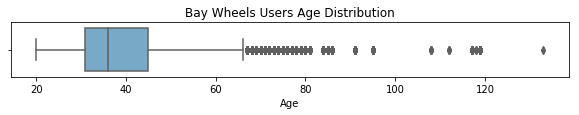

In [480]:
# Make a basic boxplot to better understand and sanity check the age distribution
plt.figure(figsize=(10,1))

sns.boxplot('member_age', data=df, palette='Blues')
plt.title("Bay Wheels Users Age Distribution")
plt.xlabel("Age")
plt.savefig('age_boxplot.png')

It looks like there are a couple outliers past age ~68 in the dataset. Let's use `describe()` to see the exact values better.

In [481]:
df.member_age.describe()

count    453159.000000
mean         38.595213
std          10.513488
min          20.000000
25%          31.000000
50%          36.000000
75%          45.000000
max         133.000000
Name: member_age, dtype: float64

38 was the mean age of the users in 2017. Again the minimum age of 20 makes sense, but the max age appears to be an outlier. Let's pinpoint exactly what age that whisker is referring to in the boxplot.

In [482]:
df.member_age.describe(percentiles = [.99])

count    453159.000000
mean         38.595213
std          10.513488
min          20.000000
50%          36.000000
99%          68.000000
max         133.000000
Name: member_age, dtype: float64

The age 68 appears to be the cutoff before we reach the outliers. Since ages 68 or lower consist of 99% of the data, we will consider ages above that as outliers and remove them from our dataset.

In [483]:
# Remove all rows where member age is over 68
df = df.query('member_age <= 68')

In [484]:
# Convert data type to integer
df['member_age'] = df['member_age'].astype('int')

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449234 entries, 0 to 519699
Data columns (total 16 columns):
duration_sec               449234 non-null int64
start_time                 449234 non-null datetime64[ns]
end_time                   449234 non-null datetime64[ns]
start_station_id           449234 non-null object
start_station_name         449234 non-null object
start_station_latitude     449234 non-null float64
start_station_longitude    449234 non-null float64
end_station_id             449234 non-null object
end_station_name           449234 non-null object
end_station_latitude       449234 non-null float64
end_station_longitude      449234 non-null float64
bike_id                    449234 non-null object
user_type                  449234 non-null category
member_birth_year          449234 non-null float64
member_gender              449234 non-null category
member_age                 449234 non-null int64
dtypes: category(2), datetime64[ns](2), float64(5), int64(2), obje

`duration_sec` is currently in seconds, which is a little too granular to be easily interpretable. Let's add a new column that is in the unit of minutes.

In [486]:
# Make a new column with duration in unit of minutes
df['duration_min'] = df['duration_sec']/60

In [487]:
# Convert data type to integer
df['duration_min'] = df['duration_min'].astype(int)

Another convenient transformation would be to expand on the `start_time` column and create additional ones that break-down the datetime into months, days, and hours.

In [488]:
# Make a new column: Start time as month (January - December)
df['start_time_month'] = df['start_time'].dt.strftime('%B')

# Make a new column: Start time as day (Monday - Sunday)
df['start_time_day'] = df['start_time'].dt.strftime('%a')

# Make a new column: Start time as hour (0 - 24)
df['start_time_hour'] = df['start_time'].dt.hour

In [489]:
# See what our transformed dataset looks like now
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age,duration_min,start_time_month,start_time_day,start_time_hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,32,1335,December,Sun,16
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,54,1313,December,Sun,15
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,22,726,December,Sun,14
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female,28,75,December,Sun,23
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990.0,Male,29,36,December,Sun,23


Finally, let's sum up what we've found so far: 

### What is the structure of the dataset?

> The 2017 Bay Wheels Bikesharing Data has 519,700 observations and 15 variables. The dataset is largely clean save for 13% of `member_birth_year` and `member_gender` missing, which is presumbly because the data is optional for users to provide. There are no duplicated rows, and the numeric columns appear to have sensible information.

### What is a main theme of interest in the dataset?

> Overall, I am curious to learn more about the demographics and user behaviour of the users that use the Bay Wheels program. What's the demographic makeup of Lyft's Bay Wheels customer base? What are some notable customer trends that could be useful for business intelligence in terms of understanding the two `user_type`s?

### What features in the dataset will help support my investigation into my theme of interest?

> A couple interesting variables to explore include `duration_sec` for average ride times, daily `start_times` to see when people use bikes the most either on a given day or throughout the year, `user_type`, `member_birth_year` and `member_gender` to understand the user base more.

## Univariate Exploration

> In this section, I investigate distributions of individual variables in preparation for taking a deeper dive into relationship between variables.

### The What: Bike Trip Duration
#### What do users do with the bikes?
Let's start by looking at bike duration. On average, how long are users using Bay Wheels for? What's the distribution of ride duration like?

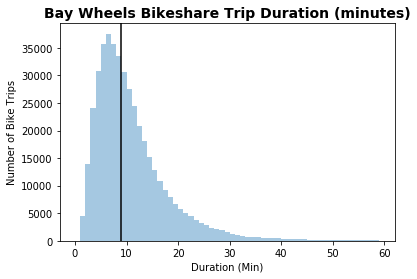

In [490]:
# Plot a histogram of bike duration in minutes
bin_edges = np.arange(0, 60, 1)

sns.distplot(df.duration_min, bin_edges, kde=False)

plt.title("Bay Wheels Bikeshare Trip Duration (minutes)", fontsize=14, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.ylabel('Number of Bike Trips')
plt.axvline(df.duration_min.median(), color='black');

plt.savefig('tripdurmin_hist.png')

**Observation 1: The black line is the median sitting close to 10, meaning most rides appear to last around ~10 minutes long. 75% of rides are under 13 minutes. Additionally, the trip duration curve is right skewed, altogether suggesting users are mostly using Bay Wheels for short distance rides around the Bay Area. This makes sense since San Francisco is a relatively dense city so there isn't as much need to go long distances unless you're deliberately biking out of the city.**

In [491]:
df.duration_min.describe()

count    449234.000000
mean         13.389893
std          42.082262
min           1.000000
25%           6.000000
50%           9.000000
75%          13.000000
max        1437.000000
Name: duration_min, dtype: float64

Analyzing trip duration already gave us lots of insight as to user intentions with the program. To better understand our users let's take a look at a couple demographics related variables.

### The Who: Age, Gender, and User Type
#### Who are the users?

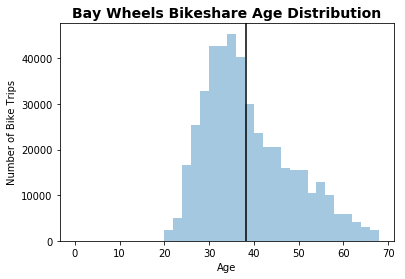

In [492]:
# Plot a histogram of member ages
bin_edges = np.arange(0, 70, 2)

sns.distplot(df.member_age, bin_edges, kde=False)

plt.title("Bay Wheels Bikeshare Age Distribution", fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Number of Bike Trips')
plt.axvline(df.member_age.mean(), color='black')

plt.savefig('agedist_hist.png')

**Observation 2: User age averages at 38, putting most users within a young and working adult age.**

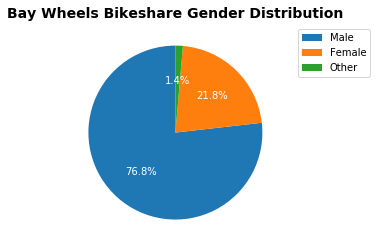

In [493]:
# Plot a pie chart of member gender

plt.pie(df.member_gender.value_counts(), startangle = 90, autopct= '%1.1f%%', textprops={'color':'white'})

plt.title('Bay Wheels Bikeshare Gender Distribution', fontsize=14, fontweight='bold')
plt.legend(['Male', 'Female', 'Other'], bbox_to_anchor=(1.04,1), loc="upper left")

plt.savefig('gender_pie.png')

**Observation 3: Around three quarters of users are male, the remaining quarter mostly female. This 3:1 male to female ratio is more or less representative of the San Francisco general demographic makeup due to a disproportionate amount of males in the prominent technology industry in San Francisco.**

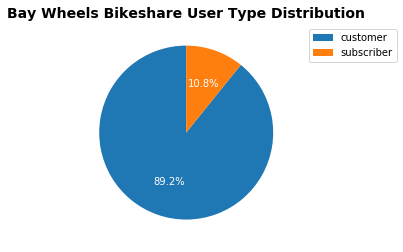

In [494]:
# Plot a pie chart of user type

plt.pie(df.user_type.value_counts(), startangle = 90, autopct= '%1.1f%%', textprops={'color':'white'})

plt.title('Bay Wheels Bikeshare User Type Distribution', fontsize=14, fontweight='bold')
plt.legend(['customer', 'subscriber'], bbox_to_anchor=(1.04,1), loc="upper left")

plt.savefig('usertype_pie.png')

**Observation 4: An overwhelming majority of users are part of the customer model as opposed to subscriber. Without knowing too much about the pricing model, we can reasonably infer that customers pay by ride whereas subscribers make fixed payments at some cadence.**

### The When: Bike Trip Usage by Month, Day, Hour
#### When do users use the bikes?
Now that we understand our users and their length of engagement with Bay Wheels, the next natural step is to learn about when exactly users use the program. Let's see if we can observe any trends in usage at the month, day, and even hour level.

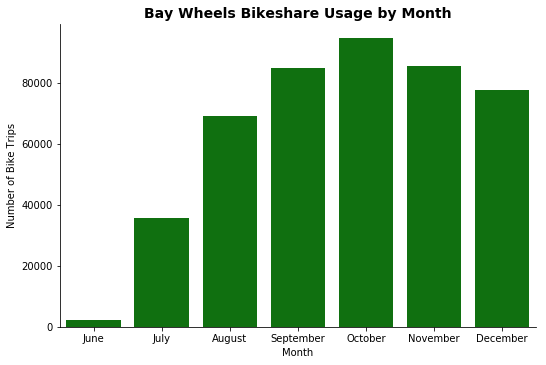

In [495]:
# Monthly usage of the Bay Wheels program
months = ['June', 'July', 'August', 'September', 'October', 'November', 'December']

sns.catplot(data = df, x = 'start_time_month', order = months, kind = 'count', color = 'green', aspect = 1.5)

plt.title("Bay Wheels Bikeshare Usage by Month", fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Bike Trips')

plt.savefig('usagemonth_bar.png')

**Observation 5: We can observe a seasonal trend with bike usage related to weather. October experiences the highest usage in Bay Wheels presumably due to the comfortable fall weather good for biking. Usage slips as we head into cold and foggy San Francsco weather as well as the holidays from November to December. It's inconclusive to evaluate engagement from June to August since the program was still newly established. However, we can hypothesize that with nice weather in those months, usage should be relatively high.**

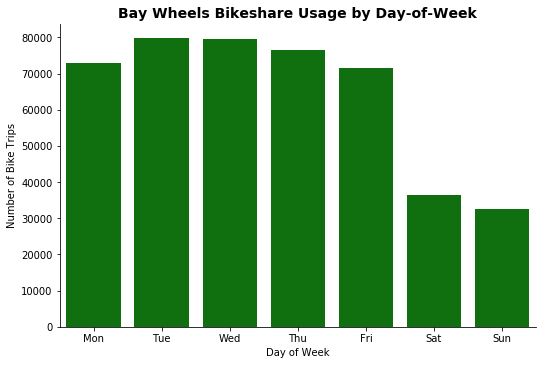

In [496]:
# Day-of-week usage of the Bay Wheels program
dayofweek = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sns.catplot(data = df, x = 'start_time_day', order = dayofweek, kind = 'count', color = 'green', aspect = 1.5)

plt.title("Bay Wheels Bikeshare Usage by Day-of-Week", fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bike Trips')

plt.savefig('usagedayofweek_bar.png')

**Observation 6: Weekday engagement is consistently high, whereas weekend engagement is low. This follows our working adult, short-commute trend that we've analyzed from other visualizations well because it looks like people bike on the weekdays in order to go to work. In comparison, we can presume fewer people use Bay Wheels for leisure purposes since weekend engagement is much lower than weekday.**

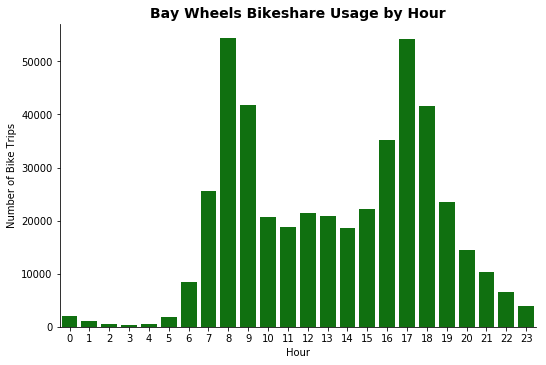

In [497]:
# Hourly usage of the Bay Wheels program
# dayofweek = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sns.catplot(data = df, x = 'start_time_hour', kind = 'count', color = 'green', aspect = 1.5)

plt.title("Bay Wheels Bikeshare Usage by Hour", fontsize=14, fontweight='bold')
plt.xlabel('Hour')
plt.ylabel('Number of Bike Trips')

plt.savefig('usagehourly_bar.png')

**Observation 7: Usage by hour reveals a bivariate trend with peaks occurring at the start and end of a typical 8-hour work day. With this, this further suggests the trend that many users are working adults that use Bay Wheels for short commutes to and from work every day.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Since thorough data cleaning occurred before heading over to visualizing and analysis, there was thankfully no transformations that had to occur at this step after observing distributions. In the data wrangling phase, it was really useful to transform data columns into more analysis-friendly values. This included transforming `duration_sec` to `duration_min` and also breaking down `start_time` into monthly, hourly, and daily categories.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Trend observed on the data appear to follow normal expectations, especially when thinking in context about what San Francisco is like. So far we've learned that the main user segment for Bay Wheels appear to be customer-model users who are majority male, young to working adults using the bikes on the weekdays to travel short distances to and from work--also only during months with better weather!


## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in the
data.

### User Type vs Trip Duration
#### How might trip duration differ based on user type?
Let's start off with looking at how `user_type` relates to trip duration.

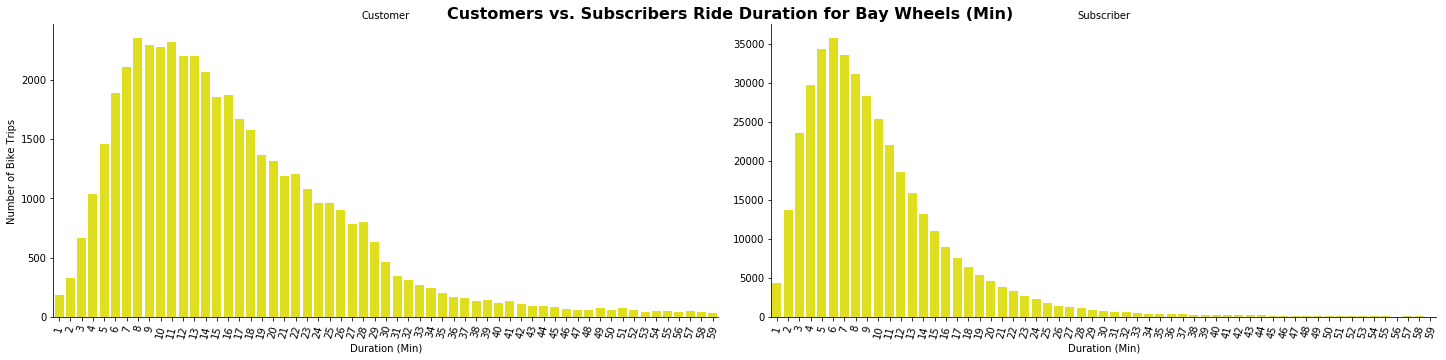

In [498]:
# Plot two bar charts comparing trip durations for both user types

# There appear to be some outliers so we'll filter to trips within an hour for this analysis
subset = df.query('duration_min < 60')

bar = sns.catplot(data=subset, x = 'duration_min', col='user_type', 
                    kind='count', sharey = False, color = 'yellow', 
                    aspect=2)

bar.set_titles('{col_name}', fontsize=14)
bar.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
bar.fig.suptitle('Customers vs. Subscribers Ride Duration for Bay Wheels (Min)', fontsize=16, fontweight='bold')
bar.set_xticklabels(rotation=75)

plt.savefig('usertypevsduration_bar.png')

**Observation 8: The graphs suggest that customers tend to have longer bike rides than subscribers. However, there are much more subscriber rides in total than customer rides. This is interesting since our pie chart earlier showed that only 10.8% of total users are under the subscription model. Despite the smaller percentage makeup, subscribers use Bay Wheels much more often and consistently than do customers. This follows a typical customer vs subscriber model. We can presume that the subscriber model has much more traction than the customer model because our demographic analysis earlier suggests that most users are working adults using bikes for short commutes. In that case, we have a much bigger segment of users who'd benefit from a subscription based model. As a result, this suggests more local working residents use the subscriber model, whereas non-working or local people tend to use the customer model more.**

### User Type vs Usage by Hour
#### Do different user types show hourly differences in when they use the bikes?

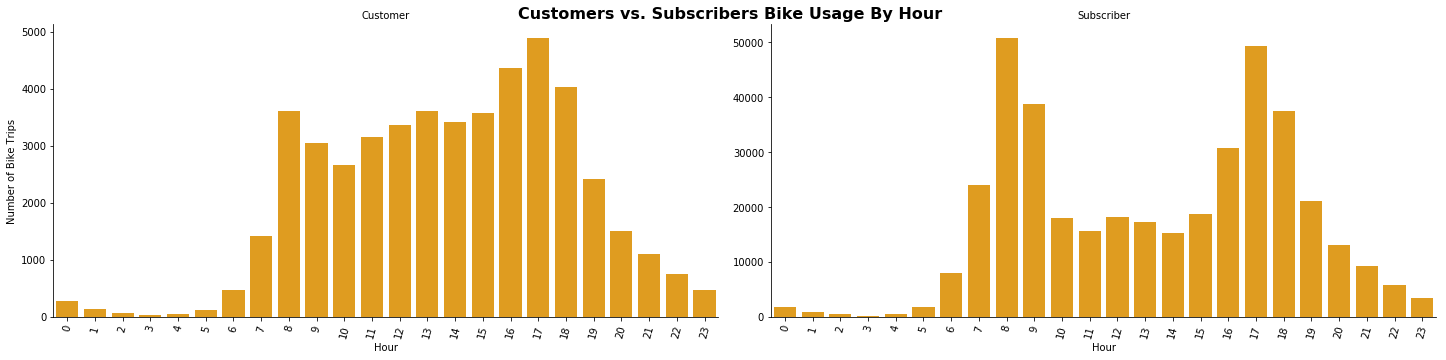

In [499]:
# Plot two bar charts comparing usage by hour for both user types

bar = sns.catplot(data=df, x = 'start_time_hour', col='user_type', 
                    kind='count', sharey = False, color = 'orange', 
                    aspect=2)

bar.set_titles('{col_name}', fontsize=14)
bar.set_axis_labels('Hour', 'Number of Bike Trips')
bar.fig.suptitle('Customers vs. Subscribers Bike Usage By Hour', fontsize=16, fontweight='bold')
bar.set_xticklabels(rotation=75)

plt.savefig('usertypevsusagehour_bar.png')

**Observation 9: Subscribers have a very apparent bivariate trend during the beginning and end of a work day, suggesting this group consists mostly of working adults. On the other hand, customers show a slight trend at the beginning and end of a day in general, with more usage during the mid afternoon as well. This suggests that the customer group likely has more transient segments such as tourists and non-working people.**

### User Type vs Usage by Age
#### Do the two user types comprise of different age distributions?

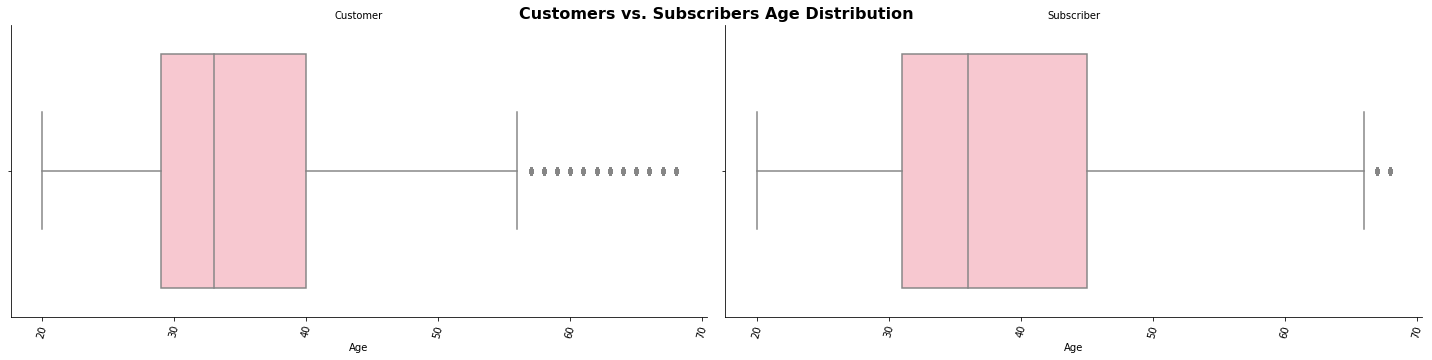

In [500]:
# Plot two bar charts comparing usage by hour for both user types

data['member_age'] = df['end_time'].astype('datetime64')

box = sns.catplot(data=df, x = 'member_age', col='user_type', 
                    kind='box', sharey = False, color = 'pink', 
                    aspect=2)

box.set_titles('{col_name}', fontsize=14)
box.set_axis_labels('Age')
box.fig.suptitle('Customers vs. Subscribers Age Distribution', fontsize=16, fontweight='bold')
box.set_xticklabels(rotation=75)

plt.savefig('usertypevsusagehour_box.png')

**Observation 10: Age distribution is overall younger in the customers user type over subscribers. Mean customer age for curstomers is ~33 whereas mean subscriber age is ~37. This follows the trend the subscribers tend to be working people whereas customers have a greater spread of both older and younger people, representing various demographic segments.

### Where were some of the relationships I observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I wanted to get more insight into the makeup of the customer vs suscriber user types. Overall we observed that the subscriber group displays more concentrated behavioural pattern reflective of a working adult demographic, whereas the customer group had more demographical variation such as tourism and non-working groups. The subscriber group of working adults consistently rode short bike rides, concentrated around the beginning and ends of working days, and consisted of an older age group. On the other hand, the customer group showed more variation across the board--longer bike rides, more rides during the day including work hours, and overall a younger age group but with more outliers on the older spectrum.

### What was an interesting relationship I found between the other features (not the main feature of interest)?

> Another interesting observation that was made is that subscribers, though consisting of only 10.8% of the total user base, take a **lot** more bike rides than do customers. Customer bike rides seem to hover around the 5,000s, but subscriber bike rides hover more around the 15,000s. This suggests that bikesharing in San Francisco is quite successful as a local mode of transportation as opposed to some other places which might have more tourism and thus more users signed up under the customer user type.

## Multivariate Exploration

> Here I created plots of three or more variables to investigate the data even
further.

Taking another step deeper into customer type analysis, let's learn more about what the gender makeup of each of these customer types are.

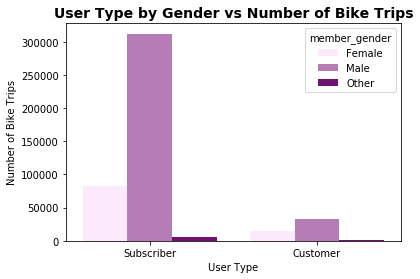

In [501]:
# Create a bar plot comparing subscriber vs customer, gender, and number of bike trips

bar = sns.countplot(data=df, x="user_type", hue="member_gender", 
                    color = 'purple', order=df.user_type.value_counts().index)

bar.set_title('User Type by Gender vs Number of Bike Trips', fontsize=14, fontweight='bold')
bar.set_xlabel('User Type')
bar.set_ylabel('Number of Bike Trips')

plt.savefig('usertypevsgendervstripcount_bar.png')

**Observation 11: There seems to be a greater male to female proportion in the subscriber user type as opposed to the customer user type. Roughly observing from the graph, it looks like the male to female ratio in the subscriber group is 5:1 whereas the customer group has a ratio of 3:1. Without further analysis it's difficult to come to a confident hypothesis regarding this trend. However, given our visualization insights one might think about how the subscriber group may consist of working adults in the technology industry in San Francisco, which is notorious for its disproportionate amount of male to female coworkers. On the other hand, the customer group consisting of more demographic groups outside of the San Francisco working group may restore some gender makeup balance in the city.**

Text(0.5, 0.98, 'User Type by Gender vs Bike Rides by Monthly Usage')

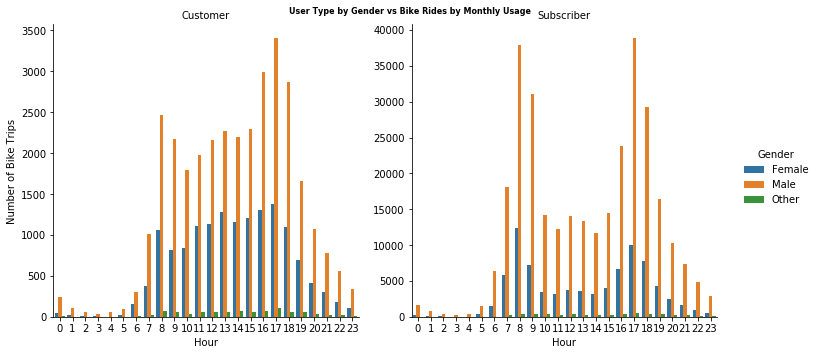

In [502]:
# Create a two-bar subplot comparing subscriber vs customer, gender, and ride usage by hour

bar = sns.catplot(data=df, x='start_time_hour', col="user_type", 
                  hue="member_gender", kind='count', sharey = False)
bar.set_axis_labels("Hour", "Number of Bike Trips")
bar._legend.set_title('Gender')
bar.set_titles("{col_name}")
bar.fig.suptitle('User Type by Gender vs Bike Rides by Monthly Usage', fontsize=8, fontweight='bold')

**Observation 12: This graph furthers our suggestion that the subscriber user type mostly consists of working adults in San Francisco, which are much more male dominant than female. The customer group overall has more females presumably because it consists of a more general population group overall. Bike usage by hour does not appear to show any substantial trends, with females following the same trend as the males, just much lower in quantity overall.**

### What were some features that strengthened each other in terms of looking at my feature(s) of interest?

> Comparing user type against gender and monthly bike usage was really insightful in accentuating the unbalanced gender ratio of the working adult group in San Francisco. The customer group has overall a more generic population gender representation, whereas the subscriber group captures the essence of the gender ratio of the working population in the city.

### What were some interesting or surprising interactions between features?

> I was surprised to not really see a change in usage by hour between males and females. Knowing San Francisco, the streets in the city can get quite dangerous at night so I was expecting to perhaps observe a much lower usage in bikes at the end of the day for females and males. It's perhaps unclear from this graph is the lower usage is due to the disproporionate gender ratio or if there is actually a trend that, gender ratio subtracted, there are fewer females riding bikes at night than males.